In [3]:
import numpy as np
import pandas as pd
#ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
import random
import os
import gc

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
#ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, KFold, cross_val_score, TimeSeriesSplit
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, mean_squared_error, mean_absolute_error
from sklearn.metrics.pairwise import linear_kernel
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, VotingRegressor, StackingRegressor, AdaBoostRegressor
from lightgbm import LGBMClassifier
# ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
import tensorflow as tf
from transformers import pipeline, set_seed, BertTokenizer, TFBertForSequenceClassification
# ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
import re
import nltk 
from nltk.corpus import stopwords
# ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
from sentence_transformers import SentenceTransformer

## YOLOv8 Installation
- You Only Look Once

In [4]:
# 근간은 CNN이다. Convolutional Neural Network

# YOLO는 작년 1월에 출시.

# 욜로가 PyTorch로 만들어짐


'''

2023년 1월 10일에 발표된 최신 모델 yolov1~v8 시리즈이다.

classification, object detection, segmentation이 모두 가능한 모델

git clone을 이용한 설치 대신 pip install 바익으로 설치

이전 버전들에 비해 사용법이 간단하고 편리 : CLI 명령어 사용

'''

'\n\n2023년 1월 10일에 발표된 최신 모델 yolov1~v8 시리즈이다.\n\nclassification, object detection, segmentation이 모두 가능한 모델\n\ngit clone을 이용한 설치 대신 pip install 바익으로 설치\n\n'

## pretrained model를 이용한 object detection

In [9]:
import ultralytics
from ultralytics import YOLO
ultralytics.checks()

Ultralytics YOLOv8.1.5 🚀 Python-3.10.13 torch-2.1.2+cpu CPU (Intel Core(TM) i5-5200U 2.20GHz)
Setup complete ✅ (4 CPUs, 7.9 GB RAM, 102.9/138.5 GB disk)


In [ ]:
# 과제의 목표 : fine tuning 하기전에  catanddog.jpg를 이용해서 
# 사전학스된 모델을 한번 써보자.

# CLI 커맨드라인 용어 ex) streamlit run contents.py


## inference (추론)

In [20]:
!yolo task=detect mode=predict model='D:\Code\DeepLearningTemplates\YOLOv8\mask_dataset\images\yolov8m.pt' source='D:\Code\DeepLearningTemplates\YOLOv8\mask_dataset\images/catanddog.jpg' save=True

Ultralytics YOLOv8.1.5 🚀 Python-3.10.13 torch-2.1.2+cpu CPU (Intel Core(TM) i5-5200U 2.20GHz)
YOLOv8m summary (fused): 218 layers, 25886080 parameters, 0 gradients, 78.9 GFLOPs

image 1/1 D:\Code\DeepLearningTemplates\YOLOv8\mask_dataset\images\catanddog.jpg: 448x640 1 cat, 1 dog, 1 chair, 1676.1ms
Speed: 11.0ms preprocess, 1676.1ms inference, 15.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\detect\predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [27]:
!yolo task=detect mode=predict model='D:\Code\DeepLearningTemplates\YOLOv8\mask_dataset\images\yolov8m.pt' conf=0.25 source='"D:\Code\DeepLearningTemplates\YOLOv8\mask_dataset\images/test5.JPG"' save=True

Ultralytics YOLOv8.1.5 🚀 Python-3.10.13 torch-2.1.2+cpu CPU (Intel Core(TM) i5-5200U 2.20GHz)
YOLOv8m summary (fused): 218 layers, 25886080 parameters, 0 gradients, 78.9 GFLOPs

image 1/1 D:\Code\DeepLearningTemplates\YOLOv8\mask_dataset\images\test5.JPG: 352x640 9 persons, 1 umbrella, 2 handbags, 1592.1ms
Speed: 9.0ms preprocess, 1592.1ms inference, 8.0ms postprocess per image at shape (1, 3, 352, 640)
Results saved to runs\detect\predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
# conf를 낮출수록 화면엔 더 많이 인식이 잡히지만 정확도는 떨어질 수 있다.
# conf를 높이면 정확도가 올라간다.

# conf의 기본값 0.25

### inference 결과 확인하기

In [24]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

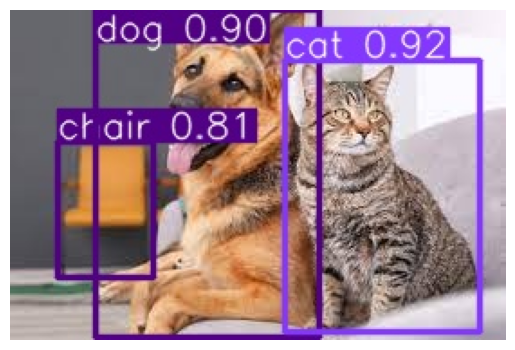

In [26]:
filename = 'D:\Code\DeepLearningTemplates\YOLOv8/runs\detect\predict\catanddog.jpg'
img = Image.open(filename)
img_arr = np.array(img)
plt.imshow(img_arr)
plt.axis('off')
plt.show()

OSError: [Errno 22] Invalid argument: '"D:\\Code\\DeepLearningTemplates\\YOLOv8\\ runs\\detect\\predict2/test5.JPG"'